In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.datasets import cifar10

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [4]:
x_train.shape

(50000, 32, 32, 3)

In [5]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

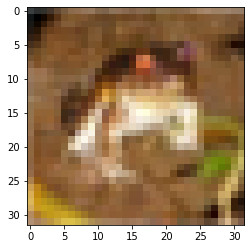

In [6]:
plt.imshow(x_train[0])

In [7]:
x_train.max()

255

In [8]:
x_test = x_test/255
x_train = x_train/255

In [9]:
y_train.min()

0

In [10]:
y_train.max()

9

In [11]:
from tensorflow.keras.utils import to_categorical

In [12]:
y_cat_test = to_categorical(y_test,10)
y_cat_train = to_categorical(y_train,10)

In [13]:
x_test.shape

(10000, 32, 32, 3)

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dense

In [15]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32,32,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32,32,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(10,activation="softmax"))
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [16]:
from tensorflow.keras.callbacks import EarlyStopping

In [17]:
early_stop = EarlyStopping(monitor='val_loss', mode='auto', patience=25, verbose=1)

In [18]:
model.fit(x_train,y_cat_train,callbacks=[early_stop],epochs=20,validation_data=(x_test,y_cat_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 13s 265us/sample - loss: 1.5209 - accuracy: 0.4469 - val_loss: 1.2526 - val_accuracy: 0.5554
Epoch 2/20
50000/50000 [==============================] - 7s 146us/sample - loss: 1.1772 - accuracy: 0.5815 - val_loss: 1.1028 - val_accuracy: 0.6166
Epoch 3/20
50000/50000 [==============================] - 9s 177us/sample - loss: 1.0296 - accuracy: 0.6395 - val_loss: 1.0808 - val_accuracy: 0.6248
Epoch 4/20
50000/50000 [==============================] - 9s 175us/sample - loss: 0.9192 - accuracy: 0.6765 - val_loss: 0.9961 - val_accuracy: 0.6592
Epoch 5/20
50000/50000 [==============================] - 8s 164us/sample - loss: 0.8350 - accuracy: 0.7085 - val_loss: 0.9832 - val_accuracy: 0.6613
Epoch 6/20
50000/50000 [==============================] - 10s 191us/sample - loss: 0.7632 - accuracy: 0.7339 - val_loss: 1.0314 - val_accuracy: 0.6479
Epoch 7/20
50000/50000 [========================

In [19]:
losses = pd.DataFrame(model.history.history)

In [20]:
losses

,loss,accuracy,val_loss,val_accuracy
0,1.520945,0.44686,1.252551,0.5554
1,1.177167,0.58152,1.102825,0.6166
2,1.029571,0.63952,1.080782,0.6248
3,0.919162,0.67646,0.996103,0.6592
4,0.835038,0.70852,0.983216,0.6613
5,0.763161,0.73386,1.031418,0.6479
6,0.692896,0.75802,0.996814,0.6724
7,0.630871,0.77930,1.011700,0.6763
8,0.568826,0.80136,1.039008,0.6761
9,0.516635,0.81870,1.068821,0.6712


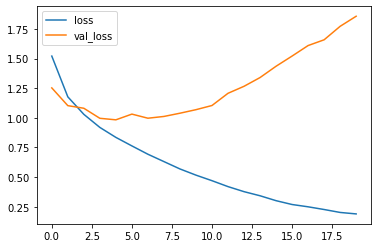

In [21]:
losses[['loss','val_loss']].plot()

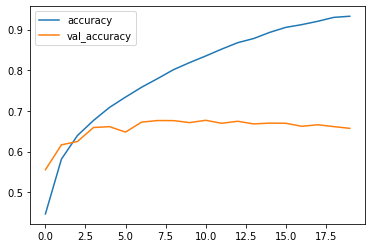

In [22]:
losses[['accuracy','val_accuracy']].plot()

In [23]:
model.metrics_names

['loss', 'accuracy']

In [24]:
model.evaluate(x_test,y_cat_test)

10000/10000 [==============================] - 1s 93us/sample - loss: 1.8570 - accuracy: 0.6571


[1.857042415046692, 0.6571]

In [25]:
from sklearn.metrics import classification_report,confusion_matrix

In [26]:
prediction = model.predict_classes(x_test)

In [27]:
prediction

array([3, 8, 1, ..., 5, 1, 7], dtype=int64)

In [28]:
y_cat_test.shape

(10000, 10)

In [29]:
y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

In [30]:
print(classification_report(y_test,prediction))

precision    recall  f1-score   support

           0       0.70      0.70      0.70      1000
           1       0.76      0.81      0.78      1000
           2       0.59      0.50      0.54      1000
           3       0.44      0.49      0.47      1000
           4       0.62      0.57      0.60      1000
           5       0.55      0.56      0.56      1000
           6       0.74      0.71      0.73      1000
           7       0.69      0.72      0.71      1000
           8       0.73      0.79      0.76      1000
           9       0.75      0.71      0.73      1000

    accuracy                           0.66     10000
   macro avg       0.66      0.66      0.66     10000
weighted avg       0.66      0.66      0.66     10000



In [31]:
confusion_matrix(y_test,prediction)

array([[701,  34,  43,  22,  24,  15,   9,  14, 103,  35],
       [ 20, 811,  11,  15,   8,   5,  14,   5,  31,  80],
       [ 81,   8, 496, 104,  91,  76,  62,  45,  23,  14],
       [ 22,  22,  59, 491,  72, 184,  48,  57,  25,  20],
       [ 24,   4,  70,  97, 574,  63,  52,  91,  20,   5],
       [ 21,   4,  47, 192,  40, 563,  25,  76,  16,  16],
       [ 10,  15,  58,  86,  34,  50, 711,  13,  12,  11],
       [ 23,   9,  30,  57,  62,  56,  14, 721,  14,  14],
       [ 51,  50,  16,  21,  11,   7,   8,   9, 789,  38],
       [ 45, 115,  13,  20,   7,   8,  13,  13,  52, 714]], dtype=int64)

In [32]:
import seaborn as sns

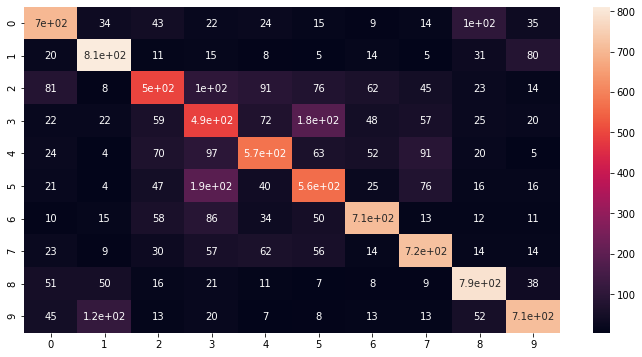

In [33]:
plt.figure(figsize=(12,6))
sns.heatmap(confusion_matrix(y_test,prediction),annot=True)

In [34]:
my_number = x_test[0]
my_number.shape

(32, 32, 3)

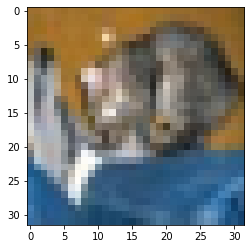

In [36]:
plt.imshow(my_number)

In [37]:
model.predict_classes(my_number.reshape(1,32,32,3))

array([3], dtype=int64)